In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys # <--- 대문자 Keys

# 크롬 드라이버 자동 업데이트
from webdriver_manager.chrome import ChromeDriverManager

#크롬드라이버 매니저를 통해 최신 드라이버를 설치하고 서비스 만들어냄
service = Service(executable_path=ChromeDriverManager().install())

# 크롬 브라우저를 자동으로 오픈하면 OK
driver = webdriver.Chrome(service=service)

URL='https://www.starbucks.co.kr/store/store_map.do?disp=locale'
driver.get(url=URL)

driver.implicitly_wait(time_to_wait=10)

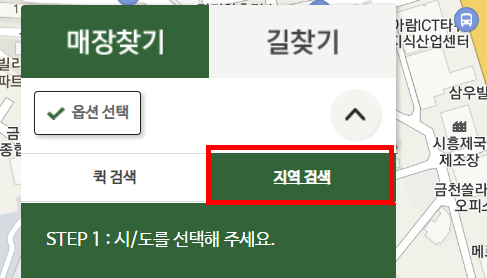

In [2]:
from selenium.webdriver.common.by import By
import time

#지역검색 버튼 클릭
location_search = driver.find_element(By.CSS_SELECTOR,"#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a")
location_search.click()

In [3]:
#시/도를 모두 찾아 출력
location_list = driver.find_elements(By.CSS_SELECTOR,"#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li")
for location in location_list:
    print(location.text,end=",")

서울,경기,광주,대구,대전,부산,울산,인천,강원,경남,경북,전남,전북,충남,충북,제주,세종,

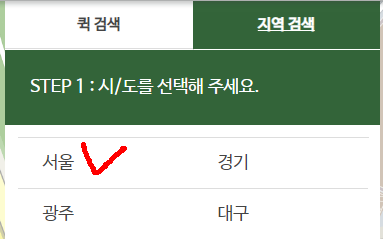

In [4]:
#서울 클릭
location_list[0].click()

In [5]:
# 이전('<' 표시) 클릭
back_click = driver.find_element(By.CSS_SELECTOR,"#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step2 > div.result_num_wrap3 > a")
back_click.click()

In [6]:
#경기 클릭
location_list[1].click()

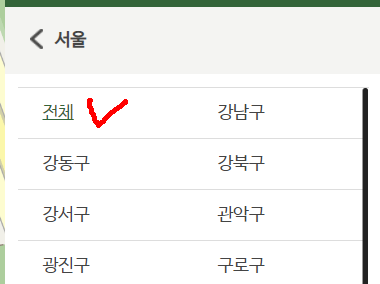

In [7]:
#전체 클릭
driver.find_element(By.CSS_SELECTOR,"#mCSB_2_container > ul > li:nth-child(1) > a").click()

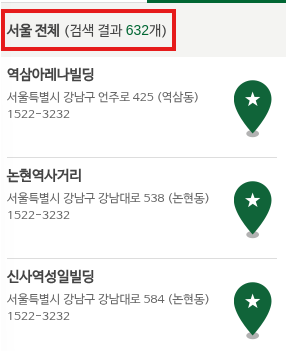

In [8]:
# 지역에서 데이터 수집하여 출력
data_name_list = []
data_lat_list = []
data_long_list = []
shop_list = driver.find_elements(By.CSS_SELECTOR,"#mCSB_3_container > ul > li")

for shop in shop_list:
    data_name_list.append(shop.get_attribute("data-name")) #매장이름
    data_lat_list.append(shop.get_attribute("data-lat"))  #매장 위도
    data_long_list.append(shop.get_attribute("data-long")) #매장 경도

print(data_name_list[0:10])
print(data_lat_list[0:10])
print(data_long_list[0:10])

['리버사이드대성리DT', '가평설악IC DT', '남이섬', '소노캄고양', '일산애니골DT', '동국대일산병원', '일산풍동DT', '백석중앙로', '일산식사', '풍산이마트']
['37.69825440707157', '37.67905252127808', '37.806624', '37.662855441267716', '37.67487449705626', '37.67645946275437', '37.662091', '37.6411', '37.67817354351826', '37.673769']
['127.3852165854917', '127.48638178238548', '127.52527', '126.75051316953129', '126.79364390723381', '126.80648567004755', '126.800900', '126.790987', '126.81203866075508', '126.786883']


In [9]:
len(data_long_list)

493

In [10]:
# 지역검색 클릭
location_click = driver.find_element(By.CSS_SELECTOR,"#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a")
location_click.click()

## 종합코드

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys # <--- 대문자 Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager # 크롬 드라이버 자동 업데이트

### ---------------------------------------------------------------크롬 브라우저로 스타벅스 사이트에서 원하는 정보 담기--------------------------------------------------------------------------###
#크롬드라이버 매니저를 통해 최신 드라이버를 설치하고 서비스 만들어냄
service = Service(executable_path=ChromeDriverManager().install())

# 크롬 브라우저를 자동으로 오픈하면 OK
driver = webdriver.Chrome(service=service)

URL='https://www.starbucks.co.kr/store/store_map.do?disp=locale'
driver.get(url=URL)

driver.implicitly_wait(time_to_wait=10)

#지역검색 버튼 클릭
location_search = driver.find_element(By.CSS_SELECTOR,"#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a")
location_search.click()

#시/도를 모두 리스트에 담기
location_list = driver.find_elements(By.CSS_SELECTOR,"#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li")

### ------------------------------------------------------------------------지역별 원하는 정보 추출을 위한 반복문 실행---------------------------------------------------------------------------###
# 각 지역에서 데이터를 수집할 리스트 생성
data_region = []     # 지역
data_name_list = []  # 이름
data_lat_list = []   # 위도
data_long_list = []  # 경도

for location in location_list:  # 17개 지역을 자동으로 클릭하기 위해서 반복문 작성
    region = location.text  # 지역 이름
    
    # 특정 지역 클릭
    location.click()
    print(f"{region}[지역버튼] 클릭")
    time.sleep(3.0)

    # 전체 클릭
    try:
        driver.find_element(By.CSS_SELECTOR,"#mCSB_2_container > ul > li:nth-child(1) > a").click()
        print("전체 클릭")
        print(f"{region} 데이터 수집 중")
        time.sleep(3.0)
    except Exception as e:
        print("전체가 없어 계속 진행합니다")  # 전체 버튼이 없는 "세종" 지역이 있기 때문에 예외처리를 작성해 줌
        time.sleep(3.0)

    # 해당 지역 데이터 수집
    shop_list = driver.find_elements(By.CSS_SELECTOR,"#mCSB_3_container > ul > li")

    for shop in shop_list:
        data_region.append(region)
        data_name_list.append(shop.get_attribute("data-name")) #매장이름
        data_lat_list.append(shop.get_attribute("data-lat"))   #매장 위도
        data_long_list.append(shop.get_attribute("data-long")) #매장 경도
        

    # 지역검색 클릭
    location_click = driver.find_element(By.CSS_SELECTOR,"#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a")
    location_click.click()
    print("[지역검색버튼] 클릭")
    time.sleep(3.0)


print("수집이 완료되었습니다.")

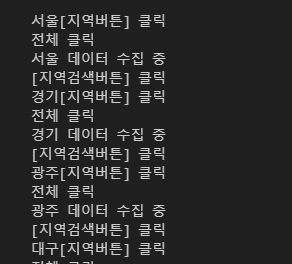

In [12]:
len(data_region)

2004

In [ ]:
# 저장할 데이터베이스 생성
data = pd.DataFrame(columns=["지역","이름","lat","long"])

data["지역"] = data_region
data["이름"] = data_name_list
data["lat"] = data_lat_list
data["long"] = data_long_list
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      2004 non-null   object
 1   이름      2004 non-null   object
 2   lat     2004 non-null   object
 3   long    2004 non-null   object
dtypes: object(4)
memory usage: 62.8+ KB


,지역,이름,lat,long
0,서울,역삼아레나빌딩,37.501087,127.043069
1,서울,논현역사거리,37.510178,127.022223
2,서울,신사역성일빌딩,37.5139309,127.0206057


In [28]:
# 파일이름: 스타벅스위치.xlsx
# pandas 라이브러리/ to_excel() 사용
data.to_excel("./data/스타벅스위치.xlsx")